# Loan Case Classifier

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline


from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [2]:
# loan test csv
df = pd.read_csv('loan_test.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [4]:
# convert date time object
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])

df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


In [5]:
df['loan_status'].value_counts()

PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64

In [7]:
# categorical to numerical values
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.727273
        COLLECTION     0.272727
male    PAIDOFF        0.744186
        COLLECTION     0.255814
Name: loan_status, dtype: float64

In [8]:
# Gender 0= male 1= female   NOTE: gender is not binary, it's a spectrum

df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0


In [9]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        1.000000
High School or Below  PAIDOFF        0.523810
                      COLLECTION     0.476190
Master or Above       PAIDOFF        1.000000
college               PAIDOFF        0.826087
                      COLLECTION     0.173913
Name: loan_status, dtype: float64

In [12]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,50,1,Bechalor
1,300,7,35,0,Master or Above
2,1000,30,43,1,High School or Below
3,1000,30,26,0,college
4,800,15,29,0,Bechalor


In [15]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')

In [44]:
# convert categorical to binary variables and append to new dataframe

new_df = df[['Principal','terms','age','Gender','education']]
new_df= pd.concat([new_df,pd.get_dummies(df['education'])], axis=1)

new_df.drop(['Master or Above'], axis = 1,inplace=True)
new_df.drop(['education'], axis = 1,inplace=True)
new_df.head()




,Principal,terms,age,Gender,Bechalor,High School or Below,college
0,1000,30,50,1,1,0,0
1,300,7,35,0,0,0,0
2,1000,30,43,1,0,1,0
3,1000,30,26,0,0,0,1
4,800,15,29,0,1,0,0


In [45]:
# define sets for new_df
X = new_df
X[0:5]

,Principal,terms,age,Gender,Bechalor,High School or Below,college
0,1000,30,50,1,1,0,0
1,300,7,35,0,0,0,0
2,1000,30,43,1,0,1,0
3,1000,30,26,0,0,0,1
4,800,15,29,0,1,0,0


In [46]:
# y axis labels
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [47]:
# NORMALIZE DATA
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211,  2.39791576,
        -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054, -0.41702883,
        -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211, -0.41702883,
         1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054, -0.41702883,
        -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  2.39791576,
        -0.79772404, -0.86135677]])

## KNN

In [48]:
# train / test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (43, 7) (43,)
Test set: (11, 7) (11,)


In [49]:
# training model
from sklearn.neighbors import KNeighborsClassifier

k=5
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [50]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [51]:
# metrics
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))


Train set Accuracy:  0.8372093023255814
Test set Accuracy:  0.9090909090909091


In [52]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];

for n in range(1,Ks): 
    # Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors =  
            n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    std_acc[n-1]= np.std(yhat==y_test) / np.sqrt(yhat.shape[0])

mean_acc

array([0.72727273, 0.63636364, 0.72727273, 0.63636364, 0.90909091,
       0.72727273, 0.81818182, 0.63636364, 0.90909091])

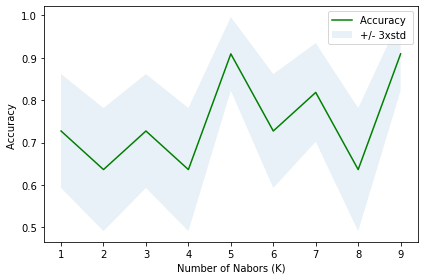

The best accuracy was with 0.9090909090909091 with k= 5


In [53]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 


In [57]:
# evaluation

KNN_jac = jaccard_similarity_score(y_test, yhat)
print(' KNN Jaccard =', KNN_jac)

KNN_f1 = f1_score(y_test, yhat, average='weighted') 
print(' KNN f1 =',KNN_f1 )

 KNN Jaccard = 0.9090909090909091
 KNN f1 = 0.8658008658008658


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


## Decision Tree

In [58]:
X = new_df
X[0:5]

,Principal,terms,age,Gender,Bechalor,High School or Below,college
0,1000,30,50,1,1,0,0
1,300,7,35,0,0,0,0
2,1000,30,43,1,0,1,0
3,1000,30,26,0,0,0,1
4,800,15,29,0,1,0,0


In [80]:
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

print(' X_trainset = ', X_trainset.shape)
print(' y_trainset = ', y_trainset.shape)

print(' X_testset = ', X_testset.shape)
print(' y_testset = ', y_testset.shape)

 X_trainset =  (37, 7)
 y_trainset =  (37,)
 X_testset =  (17, 7)
 y_testset =  (17,)


In [82]:
from sklearn.tree import DecisionTreeClassifier
LoanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
LoanTree 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [83]:
LoanTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [86]:
predTree = LoanTree.predict(X_testset)

In [87]:
print(predTree [0:5])
print(y_testset [0:5])

['PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF']


In [89]:
# Evaluation
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecTree_jac = jaccard_similarity_score(y_test, yhat)
print(' Decision Tree jaccard =',DecTree_jac)

DecTree_f1 = f1_score(y_test, yhat, average='weighted')
print('Decision Tree f1 = ',DecTree_f1)

DecisionTrees's Accuracy:  0.5882352941176471
 Decision Tree jaccard = 0.9090909090909091
Decision Tree f1 =  0.8658008658008658


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## SVM

In [90]:
# train test split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (43, 7) (43,)
Test set: (11, 7) (11,)


In [91]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [92]:
yhat = clf.predict(X_test)
yhat [0:5]

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [93]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

from sklearn.metrics import f1_score
SVM_f1 = f1_score(y_test, yhat, average='weighted')
print('SVM f1 ', SVM_f1 )


from sklearn.metrics import jaccard_similarity_score
SVM_jac = jaccard_similarity_score(y_test, yhat)
print('SVM jaccard =', SVM_jac)

SVM f1  0.707070707070707
SVM jaccard = 0.6363636363636364


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [94]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat2))


Avg F1-score: 0.8658
Jaccard score: 0.9091


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


## Logistic Regression

In [95]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211,  2.39791576,
        -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054, -0.41702883,
        -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211, -0.41702883,
         1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054, -0.41702883,
        -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  2.39791576,
        -0.79772404, -0.86135677]])

In [96]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (43, 7) (43,)
Test set: (11, 7) (11,)


In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LogReg = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LogReg

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
yhat = LogReg.predict(X_test)
yhat

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [99]:
yhat_prob = LogReg.predict_proba(X_test)
yhat_prob

array([[0.47988934, 0.52011066],
       [0.46554052, 0.53445948],
       [0.49735073, 0.50264927],
       [0.46638081, 0.53361919],
       [0.4787005 , 0.5212995 ],
       [0.498987  , 0.501013  ],
       [0.47522519, 0.52477481],
       [0.47540334, 0.52459666],
       [0.47529853, 0.52470147],
       [0.47210856, 0.52789144],
       [0.47696257, 0.52303743]])

In [102]:
LogReg_LogLoss = log_loss(y_test, yhat_prob)
print('Log Reg Log Loss =', LogReg_LogLoss)

Log Reg Log Loss = 0.6519185214049965


## Evaluation

In [100]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00         1
     PAIDOFF       0.91      1.00      0.95        10

    accuracy                           0.91        11
   macro avg       0.45      0.50      0.48        11
weighted avg       0.83      0.91      0.87        11



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [101]:
LogReg_f1 = f1_score(y_test, yhat, average='weighted') 
print('Log Reg f1 =',LogReg_f1)

LogReg_jac = jaccard_similarity_score(y_test, yhat)
print('Log Reg Jaccard =', LogReg_jac)

LogReg_LogLoss = log_loss(y_test, yhat_prob)
print('Log Reg Log Loss =', LogReg_LogLoss)

Log Reg f1 = 0.8658008658008658
Log Reg Jaccard = 0.9090909090909091
Log Reg Log Loss = 0.6519185214049965


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


## Report

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.909   | 0.865    | NA      |
| Decision Tree      | 0.909   | 0.865    | NA      |
| SVM                | 0.636   | 0.707    | NA      |
| LogisticRegression | 0.909   | 0.865    | 0.651   |